# Lab 7.07 - Time series analysis

In [1]:

# Package imports for data science
import numpy as np
import pandas as pd
import scipy.stats as stats
from pandas.api.types import CategoricalDtype
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
import math
# Package imports for time series analysis
from datetime import datetime
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error,mean_squared_error

## Exercise 7: golden cross

A *Golden Cross* is the name of a pattern that is used in the technical analysis of stock prices. A Golden Cross occurs when a short-term moving average breaks above a long-term moving average. This is an indicator for the potential of a major rally on the stock (*bull market*). The long-term moving average is then considered to be a "resistance level", i.e. when the stock price drops towards that level, it will often quickly bounce up again.

The dataset `SP500.csv` contains among others the closing price of the Standard & Poors 500, a stock market index tracking the performance of 500 large publicly traded companies in the USA. The data was collected by Hoseinzade & Haratizadeh (2019).

- Import the CSV-file in a DataFrame, parse the `Date` column as a date and set it as the index. We will only use the variable `Close`, so you can drop all other variables.
- Plot the time series to get an idea about the evolution over time of the S&P500 index.

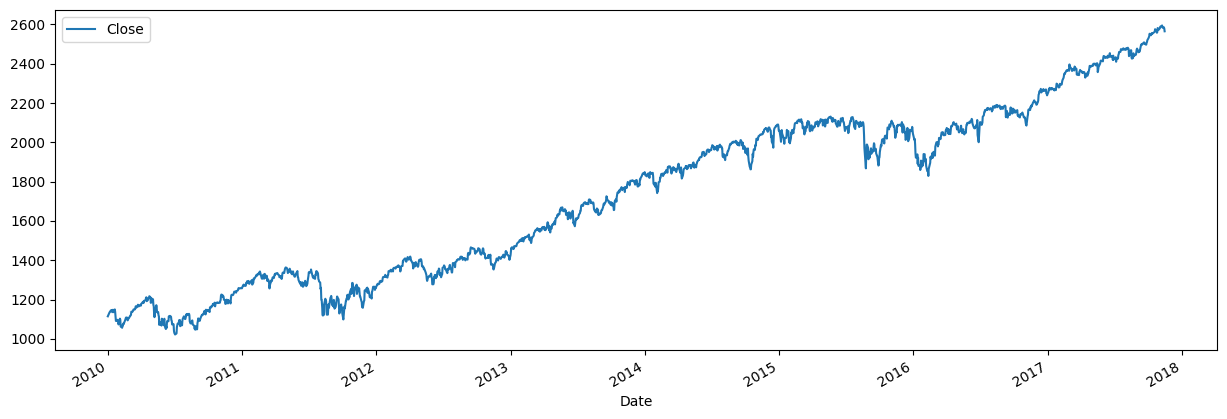

In [16]:
stocks = pd.read_csv("../data/SP500.csv", index_col=['Date'], parse_dates=True)
stocks = stocks[['Close']]
stocks.plot( y='Close', figsize=[15,5]);

Traders often use moving averages when analysing the evolution of stock prices. Specifically, the 50-day moving average is the average price over the last 10 trading weeks, making it a commonly used support level. Likewise, the 200-day moving average represents the average price over the past 40 weeks, which is used to suggest a relatively cheap price compared to the price range over most of the past year.

- Calculate the 50- and 200-day moving average and add the result as new columns in the DataFrame with names `MA50` and `MA200`, respectively.

In [17]:
stocks['SMA50'] = stocks['Close'].rolling(50).mean()
stocks['SMA200'] = stocks['Close'].rolling(200).mean()
stocks

,Close,SMA50,SMA200
Date,,,
2009-12-31,1115.099976,NaN,NaN
2010-01-04,1132.989990,NaN,NaN
2010-01-05,1136.520020,NaN,NaN
2010-01-06,1137.140015,NaN,NaN
2010-01-07,1141.689941,NaN,NaN
...,...,...,...
2017-11-09,2584.620117,2533.804614,2432.128003
2017-11-10,2582.300049,2536.017617,2433.566053
2017-11-13,2584.840088,2538.183418,2435.085754


- Plot the S&P500 index with both moving averages


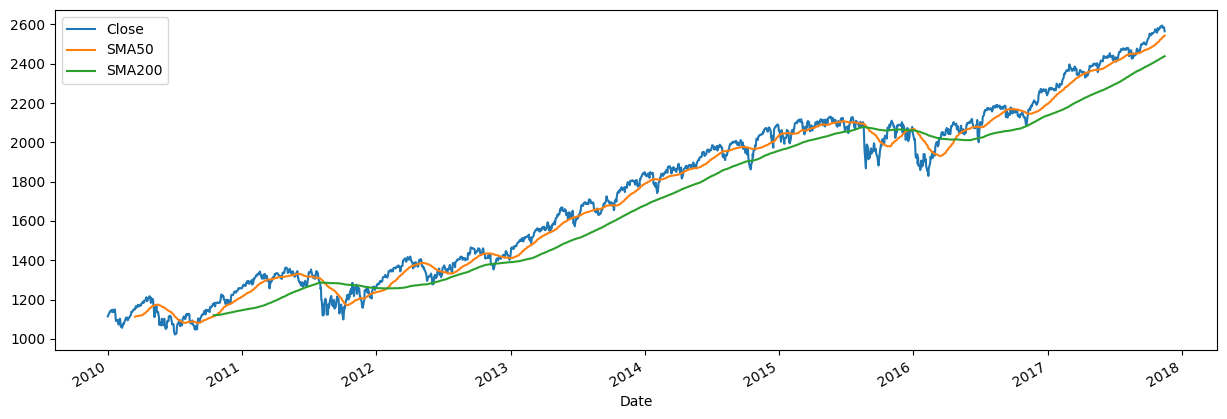

In [21]:
stocks.plot(figsize=[15,5]);


- In August 2011, stock markets across the world [saw a sharp drop in stock prices](https://en.wikipedia.org/wiki/August_2011_stock_markets_fall), due to the [European sovereign debt crisis](https://en.wikipedia.org/wiki/European_debt_crisis). Look for that drop in the plot.
- After the 2011 stock markets fall, there are *two* occurrences of a golden cross.
- Both occurrences mark the beginning of long periods with a *bull market* (characterized by rising prices). If possible, identify how long each period lasted, i.e. when does the `MA50` drops below `MA200` again?
- Can you identify occurrences when the `MA200` effectively behaves like a support level?

In [22]:
stocks[stocks['SMA50'] < stocks['SMA200']]

,Close,SMA50,SMA200
Date,,,
2010-10-15,1176.189941,1115.498999,1120.416597
2010-10-18,1184.709961,1116.760398,1120.764647
2010-10-19,1165.900024,1117.522598,1120.929197
2010-10-20,1178.170044,1118.664797,1121.137447
2010-10-21,1180.260010,1120.480598,1121.353047
...,...,...,...
2016-04-18,2094.340088,1993.703994,2014.101450
2016-04-19,2100.800049,1998.118994,2014.221550
2016-04-20,2102.399902,2003.098193,2014.389750


## References

Hoseinzade, E., & Haratizadeh, S. (2019-09). *CNNpred: CNN-based stock market prediction using a diverse set of variables.* Expert Systems with Applications, **129,** pp. 273–285. https://doi.org/10.1016/j.eswa.2019.03.029